In [146]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib

import sys

sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Plotting") #\plots.py")
from plots import *
from post_processing_class import TensorTomographyReconstruction, SH_Reconstruction, EXPSIN_Reconstruction

%reload_ext autoreload
%autoreload 2

[  125  1000  3375  8000 15625 27000 42875 91125]


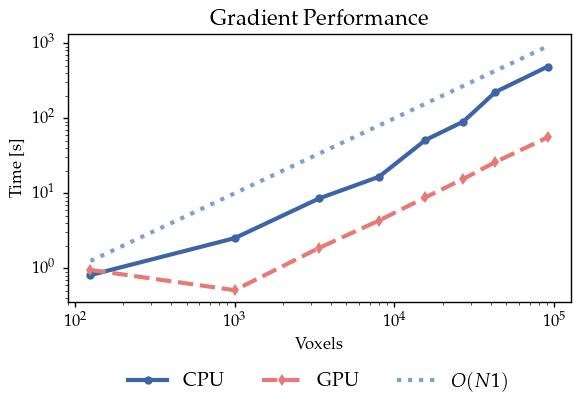

In [180]:
CPU_times = np.load(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\CPU_gradient_compute_times.npy")
GPU_times = np.load(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\GPU_gradient_compute_times.npy")

CPU_res = np.load(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\CPU_performance_results.npy", allow_pickle=True).ravel()[0]
GPU_res = np.load(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\GPU_performance_results.npy", allow_pickle=True).ravel()[0]

voxels = GPU_res['GPU']["voxels"]
print(voxels)

plot_performance_curves(voxels, CPU_times, GPU_times, help_line = 1, type = "gradient", title = "Gradient Performance", save=False)

In [104]:
Dummy_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Dummy_periodic_filter1_11cube_4off_0align.mat"
Dummy = SH_Reconstruction(Dummy_path, dataset=True)
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Dummy_periodic_filter1_11cube_4off_0align\SH\results\result_Dummy_periodic_filter1_11cube_4off_0align_q17-40_all_again_symbolic.mat"
symbolic = SH_Reconstruction(symbolic_path, dataset=False)
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Dummy_periodic_filter1_11cube_4off_0align\SH\results\result_Dummy_periodic_filter1_11cube_4off_0align_q17-40_all_again_AD_python.mat"
AD = SH_Reconstruction(AD_path, dataset=False)

Dummy_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Dummy_periodic_filter1_17cube_8off_0align.mat"
Dummy_1f17c8o = SH_Reconstruction(Dummy_path, dataset=True)
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_17cube_8off_0align_q17-40_all_again_symbolic.mat"
symbolic_1f17c8o = SH_Reconstruction(symbolic_path, dataset=False)
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_17cube_8off_0align_q17-40_all_again_AD_python.mat"
AD_1f17c8o = SH_Reconstruction(AD_path, dataset=False)


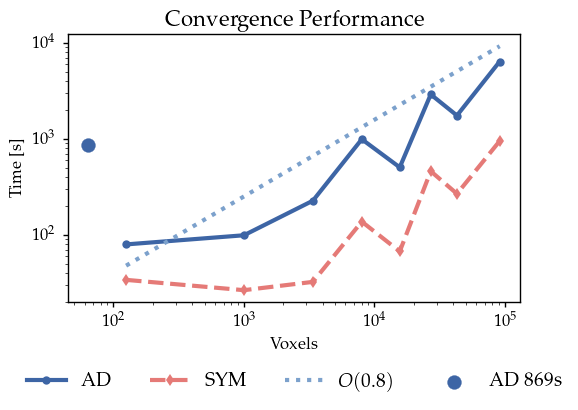

In [191]:
sym_times = []
AD_times = []

paths = [
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_5cube_0off_0align_q17-40_all_again_AD_python.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_5cube_0off_0align_q17-40_all_again_symbolic.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_10cube_0off_0align_q17-40_all_again_AD_python.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_10cube_0off_0align_q17-40_all_again_symbolic.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_11cube_4off_0align_q17-40_all_again_AD_python.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_11cube_4off_0align_q17-40_all_again_symbolic.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_17cube_8off_0align_q17-40_all_again_AD_python.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_17cube_8off_0align_q17-40_all_again_symbolic.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_20cube_0off_0align_q17-40_all_again_AD_python.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_20cube_0off_0align_q17-40_all_again_symbolic.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_27cube_8off_0align_q17-40_all_again_AD_python.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_27cube_8off_0align_q17-40_all_again_symbolic.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_30cube_0off_0align_q17-40_all_again_AD_python.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_30cube_0off_0align_q17-40_all_again_symbolic.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_37cube_8off_0align_q17-40_all_again_AD_python.mat",
r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_37cube_8off_0align_q17-40_all_again_symbolic.mat"]

for i, path in enumerate(paths):
    # path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_" + name
    if i % 2 == 0:
        AD_times.append(SH_Reconstruction(path, dataset=False).tot_time)
    else:
        sym_times.append(SH_Reconstruction(path, dataset=False).tot_time)
    

sizes = np.array([5, 10, 15,20, 25, 30, 35, 45])
AD_initially = [4, 869]

# This plot can become real nice. 

plot_performance_curves(sizes, AD_times, sym_times, AD_initially = AD_initially, help_coeff = 1, help_line = 0.8, type="convergence", title= "Convergence Performance", save=False, save_name="SH_performance_curves")

In [198]:
Dummy_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Dummy_periodic_filter1_27cube_8off_0align.mat"
Dummy_1f27c8o = SH_Reconstruction(Dummy_path, dataset=True)
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_27cube_8off_0align_q17-40_all_again_symbolic.mat"
symbolic_1f27c8o = SH_Reconstruction(symbolic_path, dataset=False)
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_27cube_8off_0align_q17-40_all_again_AD_python.mat"
AD_1f27c8o = SH_Reconstruction(AD_path, dataset=False)

4 31
19683
[0.10411525]
[0.19338132]


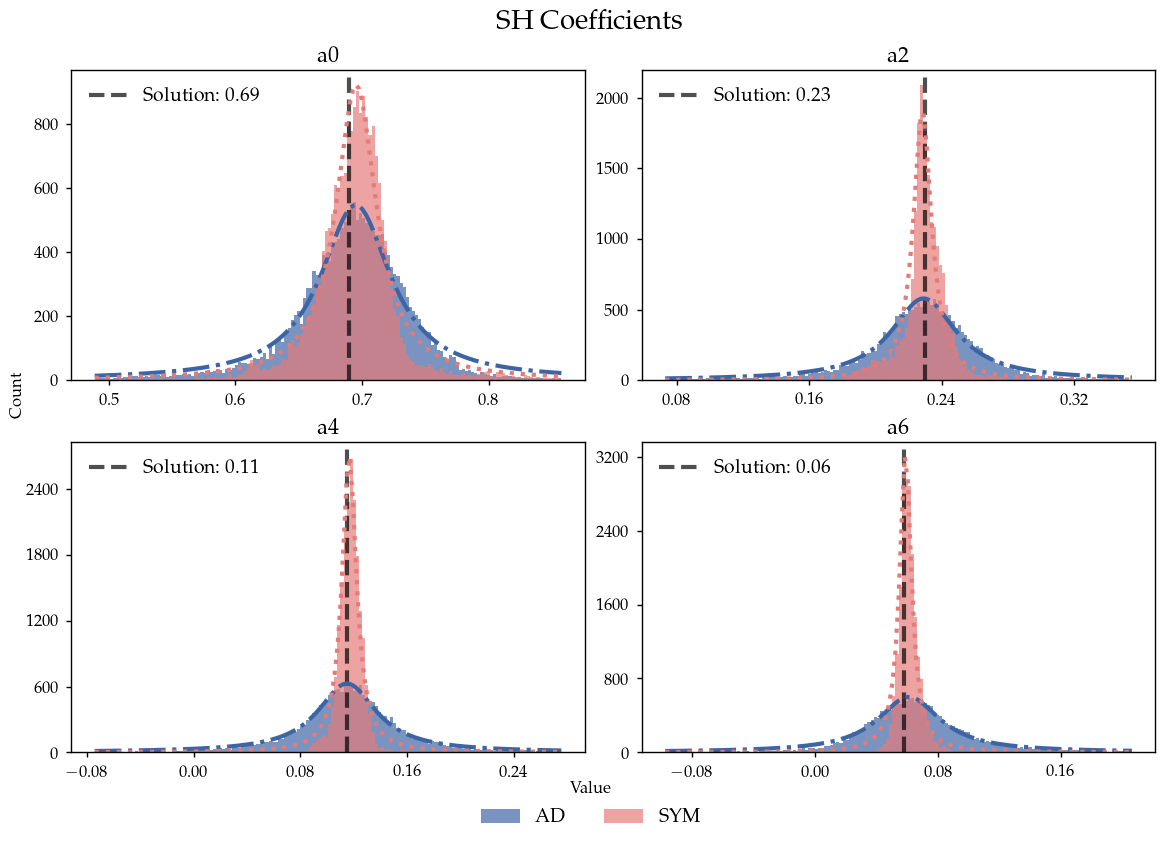

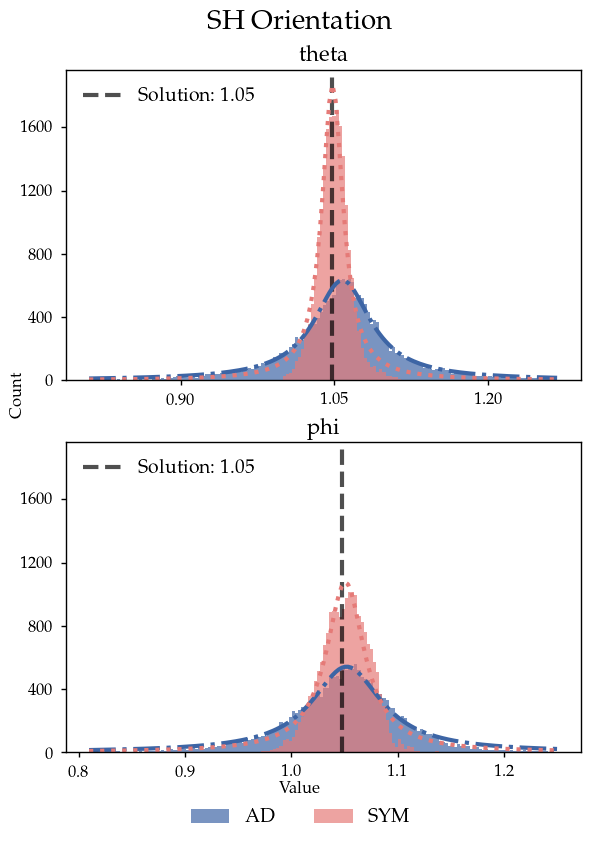

In [205]:
s1, s2 = Dummy_1f27c8o.slice
print(s1, s2)
len_test = len(AD_1f27c8o.a0[s1:s2, s1:s2, s1:s2].flatten())
print(len_test)

print(AD_1f27c8o.error_data[-1])
print(symbolic_1f27c8o.error_data[-1])

# import matplotlib_inline.backend_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


plot_SH_aligned_distribution(
    AD_1f27c8o,
    symbolic_1f27c8o,
    Dummy_1f27c8o.params[:,0,0,0],
    Dummy_1f27c8o.slice,
    "coeffs",
    title="SH ",
    bins=150,
    std_c=3,
    shape = "square",
    save=False,
    save_name="SH_coeffs_aligned_distribution",
    size_fraction = 1,
    morefigs = False,
    sharey = False
)
plot_SH_aligned_distribution(
    AD_1f27c8o,
    symbolic_1f27c8o,
    Dummy_1f27c8o.params[-2:,0,0,0],
    Dummy_1f27c8o.slice,
    "angles",
    shape = "vertical",
    title="SH ",
    bins=150,
    std_c=3.0,
    save=False,
    save_name="SH_orientation_aligned_distribution",
    shareaxis = False,
    size_fraction = 1
    )




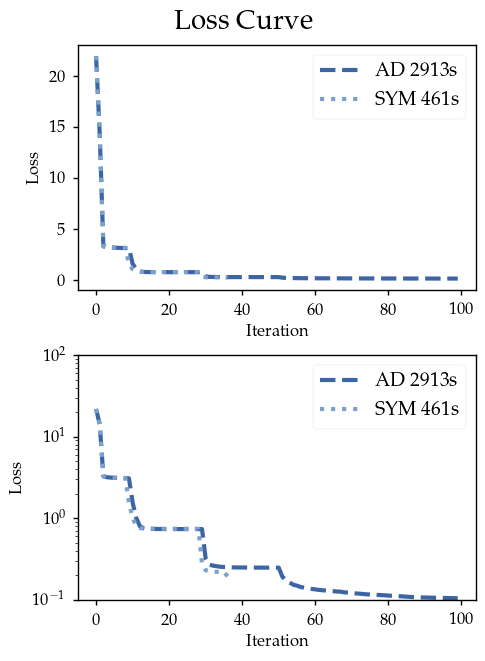

In [201]:
loss_data = {}
loss_data["AD"] = [AD_1f27c8o.loss_curve, AD_1f27c8o.tot_time]
loss_data["SYM"] = [symbolic_1f27c8o.loss_curve, symbolic_1f27c8o.tot_time]

plot_loss_curves(loss_data, save=True, save_name="Loss_curve_pres" , logcurve=True, yloglim = (1e-1,1e2))

In [107]:
Dummy_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Dummy_periodic_filter3_17cube_18off_0align.mat"
Dummy_3f17c18o = SH_Reconstruction(Dummy_path, dataset=True)
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter3_17cube_18off_0align_q17-40_correct_symbolic.mat"
symbolic_3f17c18o = SH_Reconstruction(symbolic_path, dataset=False)
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter3_17cube_18off_0align_q17-40_correct_AD_python.mat"
AD_3f17c18o = SH_Reconstruction(AD_path, dataset=False)

In [108]:
Difficult_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Difficult_periodic_filter3_17cube_8off_0align.mat"
Difficult_3f17c8o = SH_Reconstruction(Difficult_path, dataset=True)
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Difficult_periodic_filter3_17cube_8off_0align_q17-40_all_again_symbolic.mat"
symbolic_diff_3f17c8o = SH_Reconstruction(symbolic_path, dataset=False)
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Difficult_periodic_filter3_17cube_8off_0align_q17-40_all_again_AD_python.mat"
AD_diff_3f17c8o = SH_Reconstruction(AD_path, dataset=False)

C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Plotting\plots.py:417: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(right=0.8)


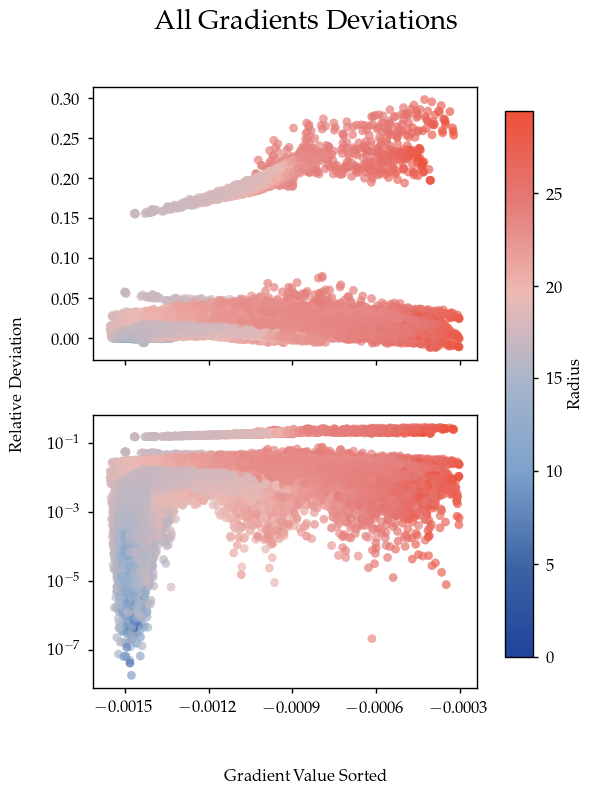

In [110]:
grad_a_AD = r"grad_a_AD_filter1_27cube_8off_0aligned.mat"
grad_a_SYM = r"grad_a_SYM_filter1_27cube_8off_0aligned"

plot_SH_deviation_grad_scatter(
    grad_a_AD,
    grad_a_SYM,
    slice = None,
    title= "All Gradients Deviations",
    incscape= False,
    save=True,
    save_name="SH_diff_grads",
    dir=r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res",
)


In [129]:
ck_symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_SASTT_carbon_knot_aligned_ASTRA_corrected_q17-40_all_again_symbolic.mat"
ck_symbolic = SH_Reconstruction(ck_symbolic_path, dataset=False)
ck_AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_SASTT_carbon_knot_aligned_ASTRA_corrected_q17-40_all_again_AD_python.mat"
ck_AD = SH_Reconstruction(ck_AD_path, dataset=False)
ck_EXPSIN_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_SASTT_carbon_knot_aligned_ASTRA_corrected_q17-40_all_again_EXPSIN_AD_python.mat"
ck_EXPSIN = EXPSIN_Reconstruction(ck_EXPSIN_path, dataset=False)


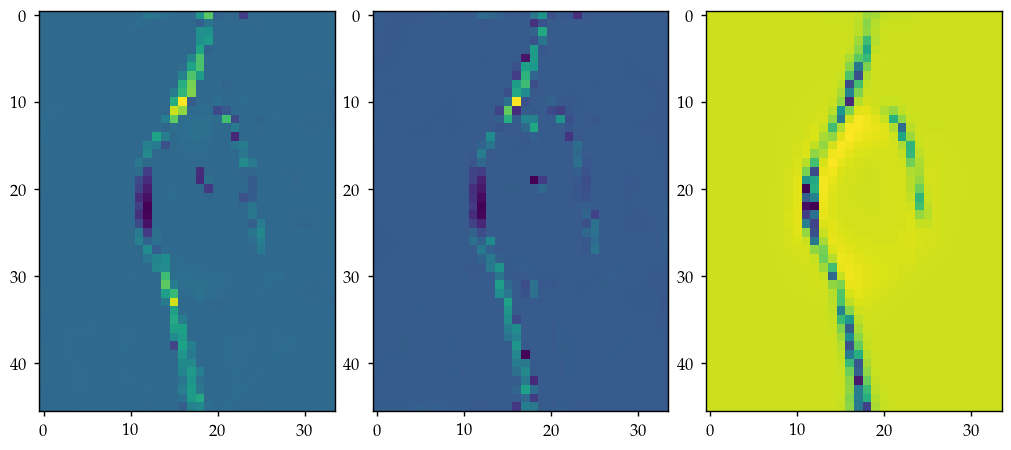

In [134]:
key = 'a6'
fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(ck_symbolic[key][:,:,17])
axs[1].imshow(ck_AD[key][:,:,17])
try:
    axs[2].imshow(ck_EXPSIN['B'][:,:,17])
except:
    pass


C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Plotting\plots.py:687: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  


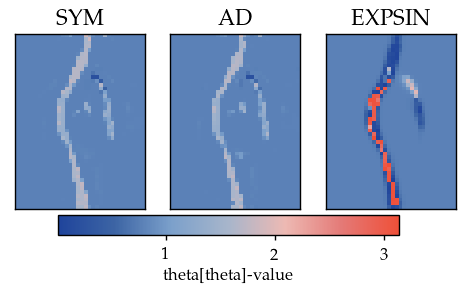

In [145]:
slice_y = (0, 46)
slice_x = (0, 34)
slice_z = (17, 18)
key_SH = 'a6'
key_EXPSIN = 'B'
plot_slices(
    ck_symbolic,
    ck_AD,
    ck_EXPSIN,
    key_SH,
    key_EXPSIN,
    (slice_y, slice_x, slice_z),
    shape="horizontal",
    save=False,
    save_name="ck_slices",
    size_fraction=0,
)

In [206]:
Dummy_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Dummy_periodic_filter1_37cube_8off_0align.mat"
Dummy_1f37c8o = SH_Reconstruction(Dummy_path, dataset=True)
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_37cube_8off_0align_q17-40_all_again_symbolic.mat"
symbolic_1f37c8o = SH_Reconstruction(symbolic_path, dataset=False)
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_37cube_8off_0align_q17-40_all_again_AD_python.mat"
AD_1f37c8o = SH_Reconstruction(AD_path, dataset=False)

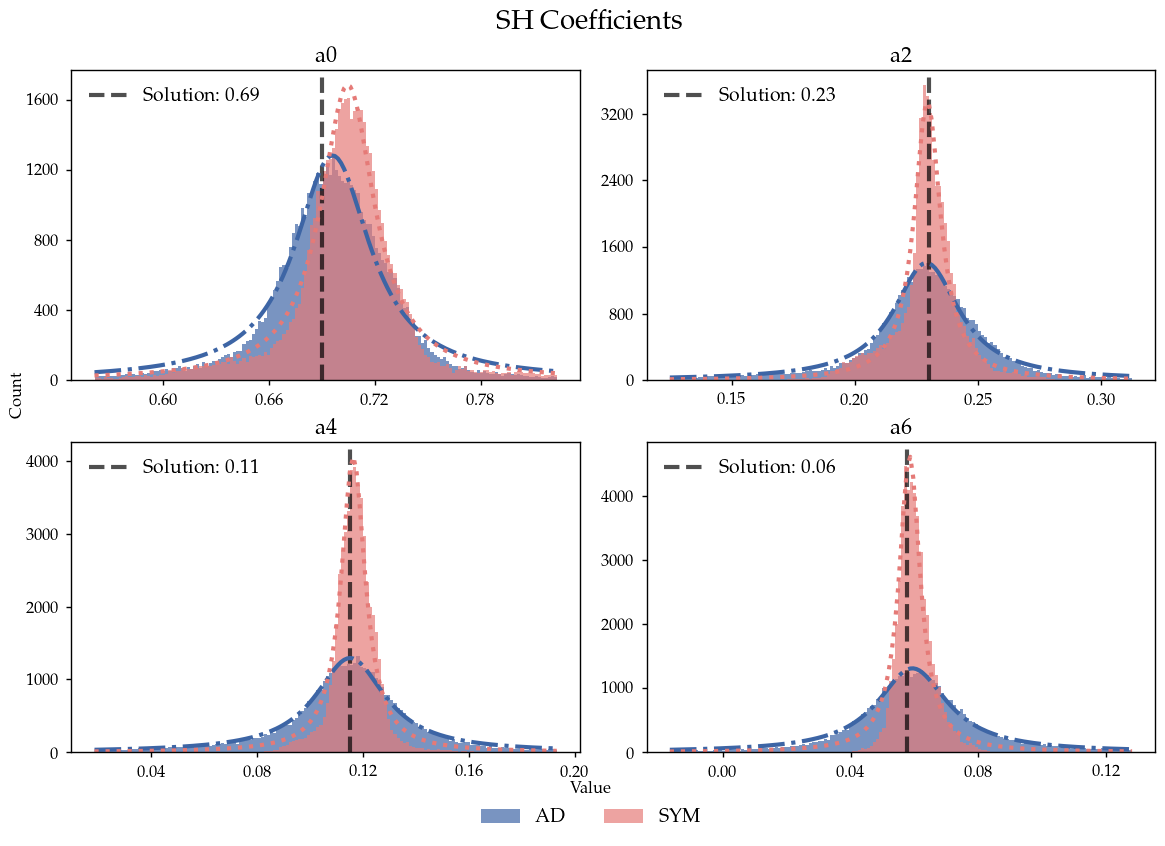

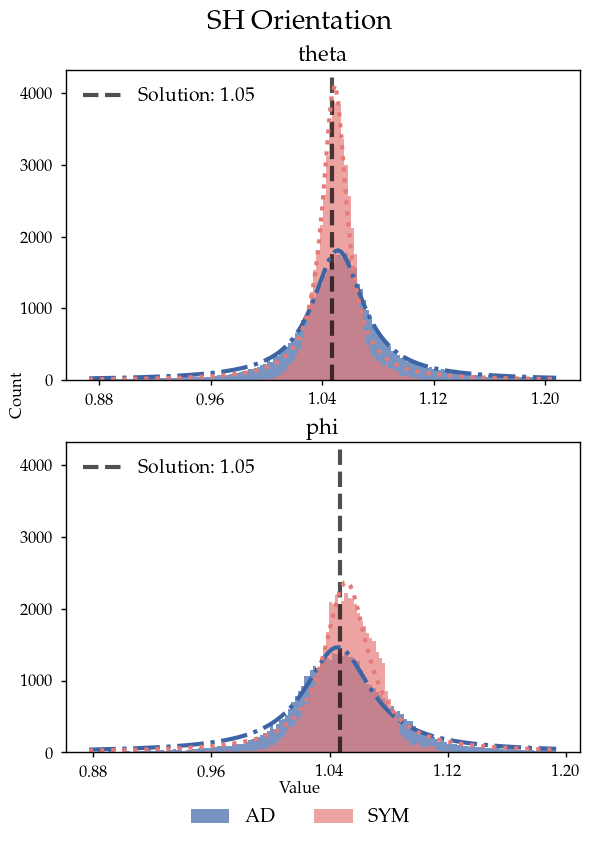

In [213]:
plot_SH_aligned_distribution(
    AD_1f37c8o,
    symbolic_1f37c8o,
    Dummy_1f37c8o.params[:,0,0,0],
    Dummy_1f37c8o.slice,
    "coeffs",
    title="SH ",
    bins=150,
    std_c=2,
    shape = "square",
    save=False,
    save_name="SH_coeffs_aligned_distribution",
    size_fraction = 1,
    morefigs = False,
    sharey = False
)
plot_SH_aligned_distribution(
    AD_1f37c8o,
    symbolic_1f37c8o,
    Dummy_1f37c8o.params[-2:,0,0,0],
    Dummy_1f37c8o.slice,
    "angles",
    shape = "vertical",
    title="SH ",
    bins=150,
    std_c=3.0,
    save=False,
    save_name="SH_orientation_aligned_distribution",
    shareaxis = False,
    size_fraction = 1
    )